# Python Crib Sheet - Coding Log

##### Compiled by R Krantz
[From:  Kinder, Jesse M.; Nelson, Philip (2015-07-01). A Student's Guide to Python for Physical Modeling. Princeton University Press. Kindle Edition.]

## Formatting with < % >:  

**s(string), f(floating point), d(decimal)**

In [1]:
import numpy as np
"The value of %s is approximately %.5f" %('pi',np.pi)

'The value of pi is approximately 3.14159'

In [35]:
s = "%d plus %d is %d"
s%(2,4,2+4)

'2 plus 4 is 6'

## Loops with < for >:  
**Blocks of code are defined only by their indentation.  And nothing else!**

**Don't forget : (colon) at the end of the first line (automatic indent afterwards).**

1. Identation consists of blank spaces or tabs
2. Indentation must be consistent within a block. **For example, you cannot use four spaces on one line and a single tab on the next; even if the tab appears to indent the block by four spaces!**
3. The indentaiton level must increase whwen starting a new block and go back to the previous level when that block ends

## < factorial >:  from scipy.misc import factorial
**First, import scipy**

In [37]:
import scipy as sci
from scipy.misc import factorial as fac
fac(10)

array(3628800.0)

## NOT EQUAL TO:  A != B; GREATER THAN:  A > B;  LESS THAN:  A < B; EQUAL TO: A == B
**etc.**

In [3]:
A,B = 4,7
A!=B, A>B, A<B,A==B, A>=B, A<=B

(True, False, True, False, False, True)

## range (Used in *for* loops)

In [56]:
import numpy as np
rows = 3
columns = 4
A = np.zeros((rows,columns))
for i in range(rows):
    for k in range (columns):
        A[i,k]=i**2 + k**3
A

array([[  0.,   1.,   8.,  27.],
       [  1.,   2.,   9.,  28.],
       [  4.,   5.,  12.,  31.]])

## Loading Data Files
Make sure data file is in working directory!

In [60]:
import numpy as np
data_set=np.loadtxt("HIVseries.csv",delimiter=',')
data_set

array([[  0.00000000e+00,   1.06100000e+05],
       [  8.31000000e-02,   9.32400000e+04],
       [  1.46500000e-01,   1.66720000e+05],
       [  2.58700000e-01,   1.53780000e+05],
       [  4.82800000e-01,   1.18800000e+05],
       [  7.44800000e-01,   1.16900000e+05],
       [  9.81700000e-01,   1.09570000e+05],
       [  1.25630000e+00,   1.11350000e+05],
       [  1.49260000e+00,   7.43880000e+04],
       [  1.72990000e+00,   8.32910000e+04],
       [  1.99150000e+00,   6.64350000e+04],
       [  3.00110000e+00,   3.54080000e+04],
       [  4.01090000e+00,   2.11250000e+04],
       [  5.00900000e+00,   2.04500000e+04],
       [  5.99430000e+00,   1.57980000e+04],
       [  7.00280000e+00,   4.78520000e+03]])

## Saving/Viewing Data Files

In [24]:
import numpy as np
data_set=np.loadtxt("HIVseries.csv",delimiter=',')
np.savetxt('x_values.dat',data_set[:,0])
np.loadtxt("x_values.dat")

array([ 0.    ,  0.0831,  0.1465,  0.2587,  0.4828,  0.7448,  0.9817,
        1.2563,  1.4926,  1.7299,  1.9915,  3.0011,  4.0109,  5.009 ,
        5.9943,  7.0028])

## Writing Directly to a File:

NOTE: 
1.  You must open a file before writing to it: my_file=open('file.txt','w'). (The 'w' option means this file will be opened for writing. This erases any existing file of the same name without any warning or request for confirmation.)
2.  You must explicitly tell Python where you want a line to start and end. The character '\n' inserts a new line wherever it occurs in a string. (The escape sequence '\t' inserts a tab.)
3.  When you are done writing, you should close a file with the command my_file.close().


In [13]:
import numpy as np
my_file = open('power.txt','w')         
print ("N\t\t2**N\t\t3**N")               #Print labels for columns
print("---\t\t----\t\t----")              #Print separator
my_file.write("N\t\t2**N\t\t3**N\n")      #Write labels to file
my_file.write("---\t\t----\t\t----\n")    #Write separator to file
#%% Loop over intergers from 0 to 10 and print/write results.
for N in range(11):
    print("{:d}\t\t{:d}\t\t{:d}".format(N,pow(2,N),pow(3,N)))
    my_file.write("{:d}\t\t{:d}\t\t{:d}\n".format(N,pow(2,N),pow(3,N)))
my_file.close()

N		2**N		3**N
---		----		----
0		1		1
1		2		3
2		4		9
3		8		27
4		16		81
5		32		243
6		64		729
7		128		2187
8		256		6561
9		512		19683
10		1024		59049


## Visualizing Data:

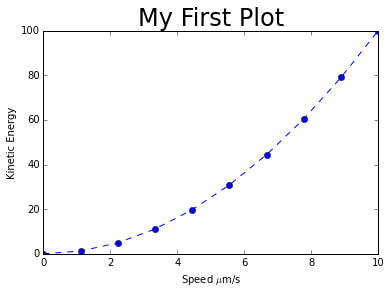

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# SIMPLE_PLOT.PY
num_points = 10
x_min,x_max=0,10
x_values=np.linspace(x_min,x_max,num_points);y_values=x_values**2
plt.plot(x_values,y_values,'b--o')
    #'b--o' means: b (blue); -- (dashed line); o (circles at data point)
    #Other plot types:
    #plt.scatter(x_values,y_values)
    #plt.loglog(x_values,y_values)
    #plt.semilogy(x_values,y_values)
plt.axis('tight')		#minimize space around plot
plt.title("My First Plot", size=24)
plt.xlabel('Speed $\\mu$m/s')
plt.ylabel('Kinetic Energy') 

## Defining Functions:

In [3]:
def  taxicab(pointA, pointB):
    """
    Taxicab metric for computing distance between points A and B. pointA = (x1, y1)
    pointB = (x2, y2) Returns |x2-x1| + |y2-y1|. Distances are measured in city blocks. 
    """ 
    interval = abs(pointB[0] - pointA[0]) + abs(pointB[1] - pointA[1]) 
    return interval
start = (3,5); stop = (14,2)
taxicab(start,stop)

14

#### Example 1:
Options:  Arguments, Keywords, and Defaults

In [4]:
import numpy as np
# ---------------------------------------------------------------
def distance(pointA, pointB=(0,0), metric = 'taxi'):
    """
    Return distance in city blocks between points A and B.
    If metric is 'taxi' (or omitted), use taxicab metric.
        pointA = (x1, y1)
        pointB = (x2, y2)
    If pointB is omitted, use the origin.
    If metric is NOT 'taxi' (or omitted), use distance:
    """
    if metric == 'taxi':
        interval = abs(pointB[0] - pointA[0]) + abs(pointB[1] - pointA[1])
    else:
        interval = np.sqrt((pointB[0] - pointA[0])**2 \
                                + (pointB[1] - pointA[1])**2 )
    return interval
dis1 = distance((3, 4.))
dis2 = distance((3, 4.),(1,2), 'taxi')
dis3 = distance(pointB=(1,2), metric ='normal', pointA=(3,4))
print('dis 1 = ',dis1,', dis 2 = ',dis2,', dis 3 = ',dis3)
#OR ------------------------
dis1,dis2,dis3

dis 1 =  7.0 , dis 2 =  4.0 , dis 3 =  2.82842712475


(7.0, 4.0, 2.8284271247461903)

#### Example 2:
Options:  Return Values

In [5]:
import numpy as np
#---------------------------------------------------------------
def rotate_vector(vector, angle):
    """
    Rotate a two-dimensional vector through a given angle.
        vector = (x, y)
        angle = rotation angle in radians (ccw)
    Returns the image of a vector under rotation as a NumPy array.
    """
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],\
                               [np.sin(angle),np.cos(angle)]])
    return np.dot(rotation_matrix, vector)
vec = [1,1]
theta = np.pi/2
r = rotate_vector(vec,theta)
x, y = rotate_vector(vec,theta)
_, z = rotate_vector(vec,theta)
first, *rest = rotate_vector(vec,theta)
print('NumPy Array: r = ', r);print('n-tuple: (x,y) = ', x,y); print('n-tuple with dummy variable "_" (discarded) = ', _,z)
print('first element, then the rest: = ', first, *rest)

NumPy Array: r =  [-1.  1.]
n-tuple: (x,y) =  -1.0 1.0
n-tuple with dummy variable "_" (discarded) =  -1.0 1.0
first element, then the rest: =  -1.0 1.0


## Functional Programming
### Guidelines:
1. Pass data to a function **only** through its arguments.
2. Do NOT modify the arguments of a function.
3. Return the result of a function with a *return* statement.

#### Example:

In [6]:
import numpy as np
#-----------------------------------------------------------
def running_average(x):
    """
    Return cumulative average of an array.
    """
    y = np.zeros(len(x)) #Empty array to store result
    current_sum = 0.0   #Running sum of elements of x
    for i in range(len(x)):
        current_sum += x[i]  #increment sum.
        y[i] = current_sum/(i+1.0)  #update running average
    return y 
#------------------------------------------------------------
xa=np.linspace(1,100,10)
run_ave = running_average(xa)
xa, run_ave

(array([   1.,   12.,   23.,   34.,   45.,   56.,   67.,   78.,   89.,  100.]),
 array([  1. ,   6.5,  12. ,  17.5,  23. ,  28.5,  34. ,  39.5,  45. ,  50.5]))

## Random Numbers and Simulation

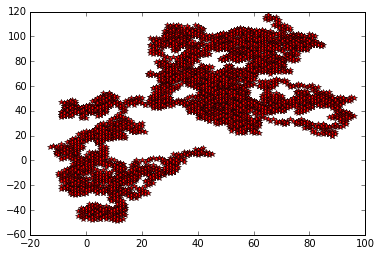

In [3]:
# Random Walk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------
plt.close('all')
from numpy.random import random as rng # Import Randon Number Generator as rng
num_steps = 9999
x_step=np.zeros(num_steps);y_step=np.zeros(num_steps)  #initialize
# Assign +1 or minus -1 to step 
x_step = np.sign(1-2*rng(num_steps));y_step = np.sign(1-2*rng(num_steps))
  # Insert leading 0 so that walk starts at (0,0)
x0=np.insert(x_step,0,0.);y0=np.insert(y_step,0,0.)  
xr=np.cumsum(x0);yr=np.cumsum(y0)     #  Accumulate steps
plt.plot(xr,yr,'r  *')

## Contour Plots
#### Example 1:

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<a list of 27 text.Text objects>

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


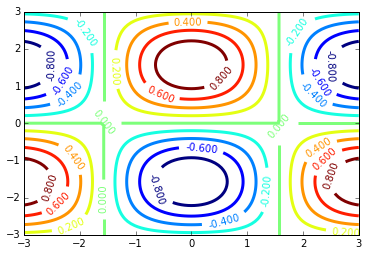

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# ----------------------------------------------------------------------
plt.close('all')
# ----------------------------------------------------------------------
x_vals = np.linspace(-3,3,101);y_vals = np.linspace(-3,3,101)
X,Y=np.meshgrid(x_vals,y_vals)       # set up mesh 
Z=np.cos(X)*np.sin(Y)                # "height" of contour
cs = plt.contour(X,Y,Z,11,linewidths = 3)     # set number of contours and linwidth of contours
plt.clabel(cs, fontsize = 10)        # label contours

####  Example 2:

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<a list of 27 text.Text objects>

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


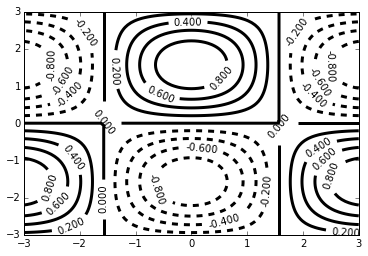

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# ----------------------------------------------------------------------
plt.close('all')
# ----------------------------------------------------------------------
x_vals = np.linspace(-3,3,101);y_vals = np.linspace(-3,3,101)
X,Y=np.meshgrid(x_vals,y_vals)
Z=np.cos(X)*np.sin(Y)
cs = plt.contour(X,Y,Z,11,linewidths = 3, colors='k')
plt.clabel(cs, fontsize = 10)

## Surface Plots (need 3D axes!)
#### Example 1:

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


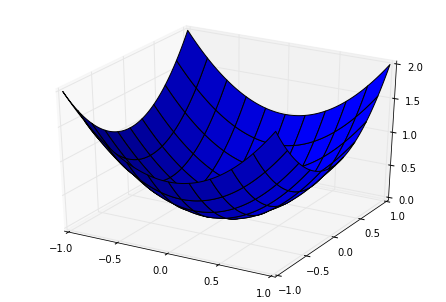

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D           #Import 3D plotting tool
%matplotlib inline
ax = Axes3D(plt.figure())              # Create 3D plotter attached to new figure
x_vals = np.linspace(-1,1,101);y_vals = np.linspace(-1,1,101)
X,Y=np.meshgrid(x_vals,y_vals)
Z=X**2 + Y**2
ax.plot_surface(X,Y,Z)        #Default uses 10% of the mesh point; Color: Default - Blue with shading

#### Example 2:

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


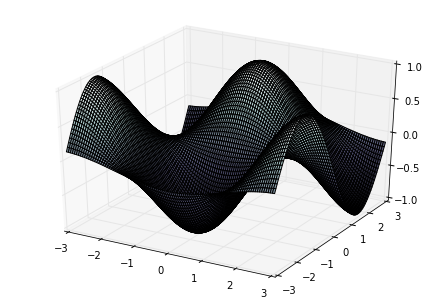

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
ax = Axes3D(plt.figure())
x_vals = np.linspace(-3,3,101);y_vals = np.linspace(-3,3,101)
X,Y=np.meshgrid(x_vals,y_vals)
Z=np.cos(X)*np.sin(Y)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='bone')   #Uses ALL meshpoints (Memory Intensive): row stride, column stride

## Numerical Solutions of Nonlinear Equations
#### Example 1:  Real functions

In [13]:
from scipy.optimize import fsolve
def f(x): return x**2 - 1
f1=fsolve(f, 0.5);f2=fsolve(f, -0.50);f3=fsolve(f,[-0.5, 0.5])
print(f1,f2,f3)

[ 1.] [-1.] [-1.  1.]


#### Examle 2:  Complex roots of real polynomials

In [14]:
from scipy.optimize import fsolve
def f(x): return x*(1 + x**3) - 1         # x**4 + x - 1 = 0
f1=fsolve(f, 1)
f2=fsolve(f, -1)
f1,f2                # fsplve gives only 2 (real) roots

(array([ 0.72449196]), array([-1.22074408]))

In [74]:
np.roots([1,0,0,1,-1])          # [1,0,0,1,-1] are coefficients of:   x**4 + x -1 = 0

array([ 1.22074408+0.j        , -0.24812606+1.03398206j,
       -0.24812606-1.03398206j, -0.72449196+0.j        ])

## Solving Systems of Linear Equations

#### Useful scipy linear algebra functions:

**inv** matrix inverse

**det** determinant

**sqrtm** matrix square root

**expm** matrix exponentiation

**eig** eigenvalues and eigenvectors of a matrix

**eigh** eigenvalues and eigenvectors of a Hermitian matrix

**svd** singular value decomposition To solve the linear system above, we need

In [15]:
import numpy as np
import scipy.linalg       # import linear algebra module from scipy
from scipy.linalg import inv      # import matrix inverse from linear algebra module
a = np.array([-1,5])
C = np.array([[1,3],[3,4]])
x = np.dot(inv(C),a)
print(x)                                # a = C x
diff = np.dot(C,x)-a              #check solution
diff

[ 3.8 -1.6]


array([  0.00000000e+00,  -8.88178420e-16])

## Numerical Integration
#### Example 1: Integrate Cos(theta) from 0 to pi/4 (result, error estimate)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate                     # import scipy.integrate module
from scipy.integrate import quad  
x1=quad(np.cos,0,np.pi/4)          # numerical integral
x2=1/np.sqrt(2)                    # exact result
x1,x2

((0.7071067811865474, 7.850462293418874e-15), 0.70710678118654746)

#### Example 2:  Integrate Cos(theta) at 50 points between 0 and 3pi [should look like a sin()]

array([  0.00000000e+00,   2.12228711e-15,   4.16630069e-15,
         6.05665408e-15,   7.72362786e-15,   9.10574121e-15,
         1.01520195e-14,   1.08238742e-14,   1.10965261e-14,
         1.12484368e-14,   1.17960506e-14,   1.27250462e-14,
         1.40093994e-14,   1.55748578e-14,   1.73603603e-14,
         1.94266090e-14,   2.14655217e-14,   2.36418412e-14,
         2.57540617e-14,   2.75614903e-14,   2.94111254e-14,
         3.09649807e-14,   3.20745222e-14,   3.26970603e-14,
         3.32268423e-14,   3.34488215e-14,   3.38811312e-14,
         3.46554057e-14,   3.56912414e-14,   3.69008925e-14,
         3.90042640e-14,   4.09090701e-14,   4.31701686e-14,
         4.54064275e-14,   4.71012022e-14,   4.93136681e-14,
         5.11636223e-14,   5.23320598e-14,   5.32444526e-14,
         5.48234536e-14,   5.56824497e-14,   5.58135112e-14,
         5.57288515e-14,   5.62942668e-14,   5.77350289e-14,
         5.95351857e-14,   6.08857350e-14,   6.28926956e-14,
         6.41647989e-14,

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


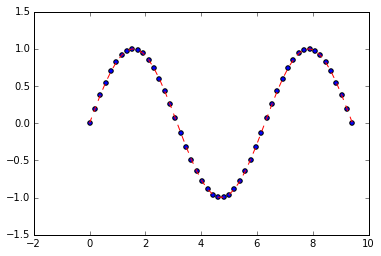

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate                     # import scipy.integrate module
from scipy.integrate import quad          # import quad from scipy.integrate module [integrates over singe variable]
x_max = np.linspace(0,3*np.pi,50)
integral = np.zeros(x_max.size); error = np.zeros(x_max.size)
for i in range(x_max.size):
    integral[i], error[i] = quad(np.cos,0,x_max[i])
plt.scatter(x_max,integral)                 # quad result: Blue dots
plt.plot(x_max,np.sin(x_max),'r--')         # "exact" result: red dashes
error

#### Example 3:  multiple variables/parameters
##### Dummy function

In [20]:
def f(x,a,b,c): return a*x**2 + b*x + c
#use a dummy function
def g(x): return f(x,1,2,3)
integral, err = quad(g,-1,1)
integral, err

(6.666666666666667, 7.401486830834378e-14)

##### Or

In [21]:
def f(x,a,b,c): return a*x**2 + b*x + c
integral, err = quad(f,-1,1,args = (1,2,3))          # function, f, needs to be first argument
integral, err

(6.666666666666667, 7.401486830834378e-14)

## Numerical Solutions to Differential Equations
#### odeint:  Differential equation must be of the form:
d**y**/dt = **F**(**y**,t)  where **y** and **F** are arrays.  **y** is the "solution"
####  Example 1:   Simple Harmonic Oscillator

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate              # Load module: scipy.integrate
from scipy.integrate import odeint   # Load odeint (ode integrate) from scipy.integrate module
plt.close('all')
# simple_oscillator
def F(y,t):         # must have t argument
    """
    Return derivatives for second-order ODE y'' = -y
    """
    dy =[0,0]         # create a list to store derivatives
    dy[0] = y[1]       # Store first derivative of y(t)
    dy[1] = -y[0] #Store second derivative of y(t)
    return dy

# create an array of time vaules:
t_min = 0; t_max = 10; dt = 0.1
t = np.arange(t_min, t_max, dt)

# Provide two sets of initial conditions:
initial_conditions = [(1.0,0.0),(0.0,1.0)]
plt.figure()         # create figure; add plots later.
for y0 in initial_conditions:
    y = odeint(F, y0, t)
    plt.plot(t, y[:,0])

skip = 5
t_test = t[::skip]                          # Compare at a subset of points
plt.plot(t_test, np.cos(t_test), 'bo')           # Exact solution for y0 = (1,0)
plt.plot(t_test, np.sin(t_test), 'go')           # Exact solution for y0 = (0,1)
plt.show()

#### Example 2:  Driven Simple Harmonic Oscillator

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate              # Load module: scipy.integrate
from scipy.integrate import odeint   # Load odeint (ode integrate) from scipy.integrate module
plt.close('all')
# simple_oscillator with driving force
def F(y,t):         # must t argument
    """
    Return derivatives for second-order ODE y'' = -y
    """
    dy =[0,0]         # create a list to store derivatives
    dy[0] = y[1]       # Store first derivative of y(t)
    dy[1] = -y[0] + np.sin(0.8*t)          #Store second derivative of y(t)
    return dy

# create an array of time vaules:
t_min = 0; t_max = 100; dt = 0.1
t = np.arange(t_min, t_max, dt)

# Provide two sets of initial conditions:
initial_conditions = [(1.0,0.0),(0.0,1.0)]
plt.figure()         # create figure; add plots later.
for y0 in initial_conditions:
    y = odeint(F, y0, t)
    plt.plot(t, y[:,0])
plt.show()

#### Example 3:  Parametric Oscillator (Use dummy function)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate              # Load module: scipy.integrate
from scipy.integrate import odeint   # Load odeint (ode integrate) from scipy.integrate module
plt.close('all')
# simple_oscillator with driving force
def F(y,t,spring_constant=1.0,mass=1.0):         # must t argument
    """
    Return derivatives for second-order ODE y'' = -(k/m)y
    y = displacement in meters [m]
    k =  spring constant in [N/m]
    m = mass in [kg]
    """
    dy =[0,0]         # create a list to store derivatives
    dy[0] = y[1]       # Store first derivative of y(t)
    dy[1] = -(spring_constant/mass)*y[0]         #Store second derivative of y(t)
    return dy
y0 = (1.0,0.0)                     # 2 initial conditions - 2 solutions
t = np.linspace(0,10,101)         #linear spacing: (start,end, # of points)

# Use dummy function
def G(y,t): return F(y,t,2.0,0.5)
yA = odeint(G,y0,t)
plt.plot(t,yA)
plt.show()

#### Example 4:  Parametric Oscillator (Use Keywords)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate              # Load module: scipy.integrate
from scipy.integrate import odeint   # Load odeint (ode integrate) from scipy.integrate module
plt.close('all')
# simple_oscillator with driving force
def F(y,t,spring_constant=1.0,mass=1.0):         # must t argument
    """
    Return derivatives for second-order ODE y'' = -(k/m)y
    y = displacement in meters [m]
    k =  spring constant in [N/m]
    m = mass in [kg]
    """
    dy =[0,0]         # create a list to store derivatives
    dy[0] = y[1]       # Store first derivative of y(t)
    dy[1] = -(spring_constant/mass)*y[0]         #Store second derivative of y(t)
    return dy
y0 = (1.0,0.0)                     # 2 initial conditions - 2 solutions
t = np.linspace(0,10,101)         #linear spacing: (start,end, # of points)

# Use Keywords
yB = odeint(F,y0,t,args=(2.0,0.5))
plt.plot(t,yB)
plt.show()

## Vector Fields and Streamlines
### Vector Fields: 
#### Example 1: quiver

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


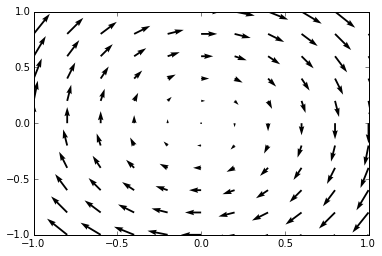

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
coords = np.linspace(-1,1,11)
X,Y = np.meshgrid(coords,coords)
Vx,Vy = Y, -X
plt.quiver(X,Y,Vx,Vy)

#### Example 2: gradient

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


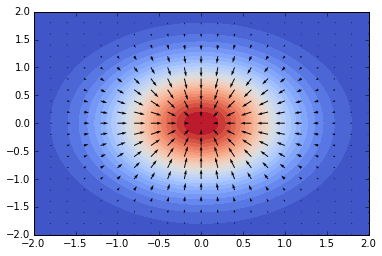

In [11]:
import numpy as np; import matplotlib.pyplot as plt
%matplotlib inline

plt.close('all')
coords = np.linspace(-2,2,101)
X,Y = np.meshgrid(coords[::5],coords[::5])     #Course grid for vector field
R = np.sqrt(X**2 + Y**2)
Z = np.exp(-R**2)
x,y = np.meshgrid(coords,coords)              # Fine grid for contour plot
r = np.sqrt(x**2 + y**2)
z = np.exp(-r**2)

ds = coords[5] - coords[0]                      #Course grid spacing
dX, dY = np.gradient(Z, ds)                    #Calculate gradient

plt.contourf(x,y,z,25)
plt.set_cmap('coolwarm')
plt.quiver(X,Y,dX.transpose(),dY.transpose(),scale=25,color='k')

## Streamlines

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


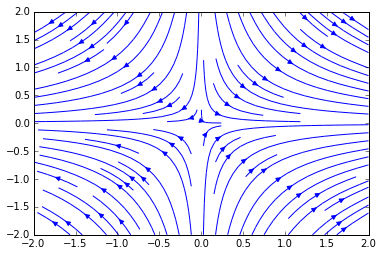

In [12]:
import numpy as np; import matplotlib.pyplot as plt
%matplotlib inline
lower = -2;upper = 2; step = 0.2
coords =np.arange(lower, upper +step, step)
X,Y = np.meshgrid(coords,coords)
Vx =X; Vy = -Y
plt.streamplot(X,Y,Vx,Vy)

## Random Walk
#### Example 1:  1D Random Walk

Root Mean Square =  20.1566763133 square root of num_steps =  20.0


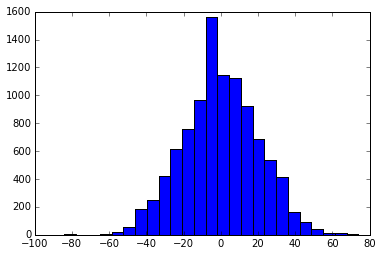

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import random as rng
num_steps = 400
last_steps = 10000
x_last=np.zeros(last_steps);x2=np.zeros(last_steps)
def rand(x):
    y = np.sign(1-2*rng(x))
    return y
for i in range(last_steps):
    x_step = rand(num_steps)
    xr=np.cumsum(x_step)
    x_last[i]=xr[-1]
    x2[i]=xr[-1]**2
plt.figure()
plt.hist(x_last,25)
xrms=np.sqrt(np.mean(x2))
print('Root Mean Square = ',xrms,'square root of num_steps = ',np.sqrt(num_steps))

#### Example 2:  2D Random Walk

root mean square distance =  19.9931138145 STD of the Mean =  0.463831244617
Sqrt of N =  20.0


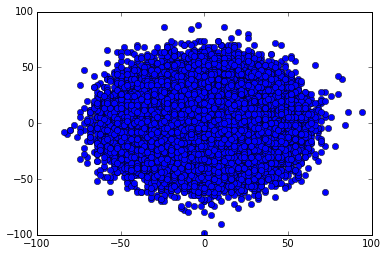

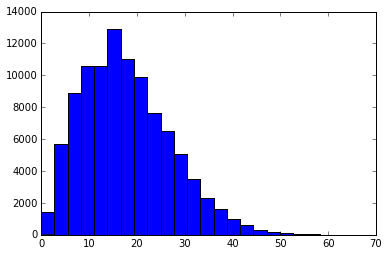

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import random as rng
num_steps = 400
last_steps = 100000
x_last=np.zeros(last_steps);y_last=np.zeros(last_steps);dist=np.zeros(last_steps)
def rand(x):
    y = np.sign(1-2*rng(x))
    return y
for i in range(last_steps):
    x_step = rand(num_steps)
    y_step = rand(num_steps)
    xr=np.cumsum(x_step)
    yr=np.cumsum(y_step)
    x_last[i]=xr[-1]
    y_last[i]=yr[-1]
    dist[i]=np.sqrt((xr[-1]**2 + yr[-1]**2)/2)
plt.figure()
plt.plot(x_last,y_last,'b  o')
plt.figure()
plt.hist(dist,25)
xm=np.mean(x_last)
ym=np.mean(y_last)
drms=np.sqrt(np.mean(dist**2))
sd=np.std(dist)
print('root mean square distance = ',drms,'STD of the Mean = ',sd/np.sqrt(num_steps-1))
print('Sqrt of N = ',np.sqrt(num_steps))

####  Example 3:  3D Random Walk

Root Mean Square Distance =  34.8096136146 Square Root of num_steps =  34.6410161514


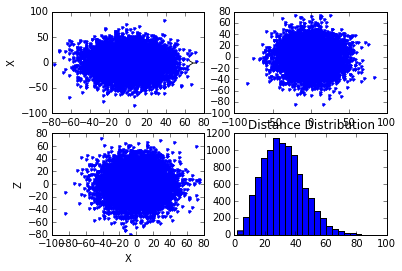

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.gca()
from numpy.random import random as rng
plt.close()
num_steps = 400
last_steps = 10000
x_last=np.zeros(last_steps)
y_last=np.zeros(last_steps)
z_last=np.zeros(last_steps)
dist=np.zeros(last_steps)
def rand(x):
    y = np.sign(1-2*rng(x))
    return y
for i in range(last_steps):
    x_step = rand(num_steps)
    y_step = rand(num_steps)
    z_step = rand(num_steps)
    xr=np.cumsum(x_step)
    yr=np.cumsum(y_step)
    zr=np.cumsum(z_step)
    x_last[i]=xr[-1]
    y_last[i]=yr[-1]
    z_last[i]=zr[-1]
    dist[i]=np.sqrt(xr[-1]**2 + yr[-1]**2 + zr[-1]**2)
plt.subplot(2,2,1);plt.plot(x_last,y_last,'b  .')
plt.xlabel('Y');plt.ylabel('X')
plt.subplot(2,2,2);plt.plot(y_last,z_last,'b  .')
plt.xlabel('Z');plt.ylabel('Y')
plt.subplot(2,2,3);plt.plot(z_last,x_last,'b  .')
plt.xlabel('X');plt.ylabel('Z')
plt.subplot(2,2,4);plt.hist(dist,25);plt.title('Distance Distribution')
xm=np.mean(x_last)
ym=np.mean(y_last)
zm=np.mean(z_last)
rms=np.sqrt(np.mean(dist**2))
sd=np.std(dist)
print('Root Mean Square Distance = ',rms,'Square Root of num_steps = ',np.sqrt(3*num_steps))

####  Example 4: Poisson Distribution (8% Heads: 92% Tails)

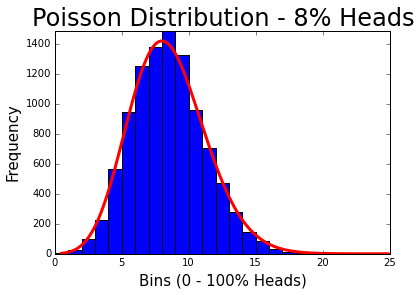

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import factorial as fac
ax = plt.gca()
# ----------------------------------------------------------------------
plt.close('all')
# ----------------------------------------------------------------------
from numpy.random import random as rng
num_flips = 100
trials = 10000
all_flips = np.zeros(num_flips)
num_heads=np.zeros(trials)
def rand(x):
    y = np.sign(8-100*rng(x))
    return y
for i in range(trials):
    all_flips= rand(num_flips)
    heads = all_flips >= 0
    num_heads[i] = np.sum(heads)
plt.figure()
plt.hist(num_heads,25,(0,25))
l_values = np.arange(0,24.5,0.1)
P = (np.exp(-8))*(8**l_values)/fac(l_values)
plt.plot(l_values+0.5,trials*P,'r',linewidth = 3)
plt.axis('tight')  # Minimize space around plot
plt.title("Poisson Distribution - 8% Heads", size=24)
plt.xlabel('Bins (0 - 100% Heads)', size=15)
plt.ylabel('Frequency', size=15)

#### Example 5:  Poisson Distribution - Number of Tails between Heads (8% Heads)

(11.504592318417416, 0.0037926600903264111)

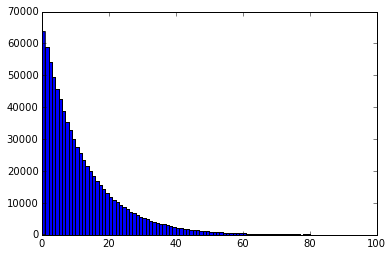

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import random as rng
plt.close()
#--------------------------------------------------------
num_flips = 10000000
rand = (1+np.sign(8-100*rng(num_flips)))/2 #8% Heads
NonZ = np.nonzero(rand)   #nonzeros
Diff = np.diff(NonZ)-1
Difflat=Diff.flatten()
Ave=np.mean(Difflat)
STD=np.std(Difflat)
plt.hist(Difflat,100,(0,100))
Ave,STD/np.sqrt(num_flips-1)

# SymPy

In [47]:
import sympy
from sympy import *
init_session()
#----------------------------------------------------------------
a=expand((x+y)**5)
b=factor(x**6 - 1)
c=pi.n(100)
d=diff(x*sin(y),x,y)
e=integrate(cos(x)**2,x)
f=integrate(exp(-x**2),(x,-oo,oo))
g=Sum(k**3,(k,0,m)).doit().factor()
#
print('((x+y)**5) = ',a)
print('(x**6 -1) = ',b)
print('Pi to 100 places = ',c)
print('Derivative of x*sin(y) = ',d)
print('Integral of Cos(x) =',e)
print('Integral of exp(-x**2) from  inf to + inf =',f)
print('Sum of k**3 from 0 to m = ',g)
#plot(besselj(0,x),besselj(1,x),(x,0,10))

IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org
((x+y)**5) =  x**5 + 5*x**4*y + 10*x**3*y**2 + 10*x**2*y**3 + 5*x*y**4 + y**5
(x**6 -1) =  (x - 1)*(x + 1)*(x**2 - x + 1)*(x**2 + x + 1)
Pi to 100 places =  3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
Derivative of x*sin(y) =  cos(y)
Integral of Cos(x) = x/2 + sin(x)*cos(x)/2
Integral of exp(-x**2) from  inf to + inf = sqrt(pi)
Sum of k**3 from 0 to m =  m**2*(m + 1)**2/4
